## 1. Make predictions with regression

In [1]:
# Install the necessary modules.
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install scipy
!pip install matplotlib

### 1. Prepare workstation & Import necessary packages

In [2]:
#import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

### 2. Import the datasets

In [3]:
# import the data set
df = pd.read_csv("lego.csv")

# view DataFrame
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [4]:
# check dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [7]:
# check number of missing values
df.isnull().sum()


ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
sales                0
dtype: int64

### 3. Define the variables

In [8]:
# add sales column
df["sales"]= df["list_price"] * df["piece_count"]
df

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country,sales
0,19,29.9900,2,277,4.0,0,20,8307.2300
1,19,19.9900,2,168,4.0,2,20,3358.3200
2,19,12.9900,11,74,4.3,2,20,961.2600
3,5,99.9900,23,1032,3.6,0,20,103189.6800
4,5,79.9900,14,744,3.2,1,20,59512.5600
...,...,...,...,...,...,...,...,...
12256,23,36.5878,6,341,4.4,2,19,12476.4398
12257,23,24.3878,8,217,4.1,2,19,5292.1526
12258,23,24.3878,18,233,4.6,2,19,5682.3574
12259,20,12.1878,1,48,5.0,4,19,585.0144


In [9]:
# choose your variables
x = df["piece_count"].values.reshape(-1, 1) 
y = df["list_price"].values.reshape(-1, 1)  

### 4. Run a linear regression

In [10]:
# run linear regression
lr = LinearRegression()

In [11]:
# fit the model 
lr.fit(x,y)

LinearRegression()

In [12]:
# predict y values
lr.predict(y)

array([[20.2307598 ],
       [19.26162524],
       [18.58323104],
       ...,
       [19.68783124],
       [18.50548707],
       [18.50548707]])

### 5. Plot a linear regression (1 variable)

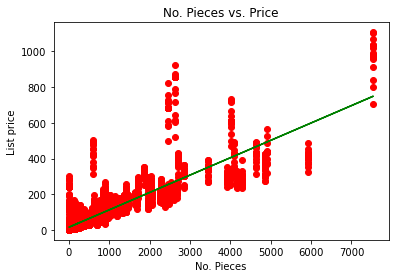

In [14]:
# Visualization
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "green")
plt.title("No. Pieces vs. Price")
plt.xlabel("No. Pieces")
plt.ylabel("List price")

plt.show()

### 6. Run a univariate regression model

In [91]:
# Print R-squared value of the test data.
print(lr.score(x,y)) 

0.7562562125135581


In [92]:
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  [17.32432525]
Coefficient value:  [[0.09691346]]


In [93]:
f = 'y ~ X'
test = ols(f, data = df).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 3.804e+04
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:59:10   Log-Likelihood:                -64182.
No. Observations:               12261   AIC:                         1.284e+05
Df Residuals:                   12259   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3243      0.478     36.256      0.000      16.388      18.261
X              0.0969      0.000    195.027      0.000       0.096       0.098
==============================================================================
Omnibus:                    13987.172   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2037748.322
Skew:                           5.819   Prob(JB):                         0.00
Kurtosis:                      65.075   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
# Use the predict() method 
price = lr.predict([[8000]])  

# Print the results.
print(price)  

[[792.6319753]]


#### <font color='green'> KR : Based on univariate linear regression price recommended is $792 for 8000 pieces </font>


### 7. Check another variable (ages)


In [16]:
# check relations between age and price
x = df["ages"].values.reshape(-1, 1) 
y = df["list_price"].values.reshape(-1, 1)  

In [17]:
# run linear regression
lr = LinearRegression()

# fit the model 
lr.fit(x,y)

LinearRegression()

In [18]:
# predict y values
lr.predict(y)

array([[53.56274321],
       [62.2678243 ],
       [68.36138106],
       ...,
       [58.43950374],
       [69.05970267],
       [69.05970267]])

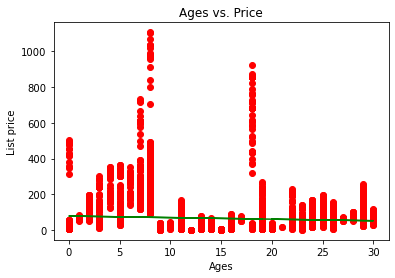

In [19]:
# Visualization
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "green")
plt.title("Ages vs. Price")
plt.xlabel("Ages")
plt.ylabel("List price")

plt.show()

In [20]:
# Print R-squared value of the test data.
print(lr.score(x,y)) 

0.006050049767094556


#### <font color='green'> KR: Age and list price has minimal correlation of 0.6%. </font>

### 8. Mulitple linear regression (price, age and list price) 

In [21]:
x = df[['piece_count','ages']] #  2 variables for multiple regression. 
y = df['list_price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
new_pieces = 8000
new_age = 30
print ('Pred: \n', regr.predict([[new_pieces ,new_age]]))



Intercept: 
 16.79547480305044
Coefficients: 
 [0.0969419  0.03084905]
Pred: 
 [793.25612181]


C:\Users\Kristina\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### <font color='green'> KR: To recommend $793 for 8000 lego pieces and 30 year old customers. Having said that, customer age has little correlation on determining price.</font>

In [22]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 1.902e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:46:19   Log-Likelihood:                -64182.
No. Observations:               12261   AIC:                         1.284e+05
Df Residuals:                   12258   BIC:                         1.284e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.7955      0.983     17.083      